In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('Jamboree_Admission.csv')

# **Define Problem Statement and perform Exploratory Data Analysis**

**Problem Statement:**To analyse factors affecting graduate admissions and predict chances of admission

In [26]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
df.shape

(500, 9)

In [28]:
df.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [29]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [30]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [31]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [32]:
# Rename the 'LOR ' column to 'LOR' without the space
df.rename(columns={'LOR ': 'LOR'}, inplace=True)
df.rename(columns={'Chance of Admit ':'Chance of Admit'},inplace=True)

# **Univariate Analysis**   

**distribution plots of all the continuous variable(s)**

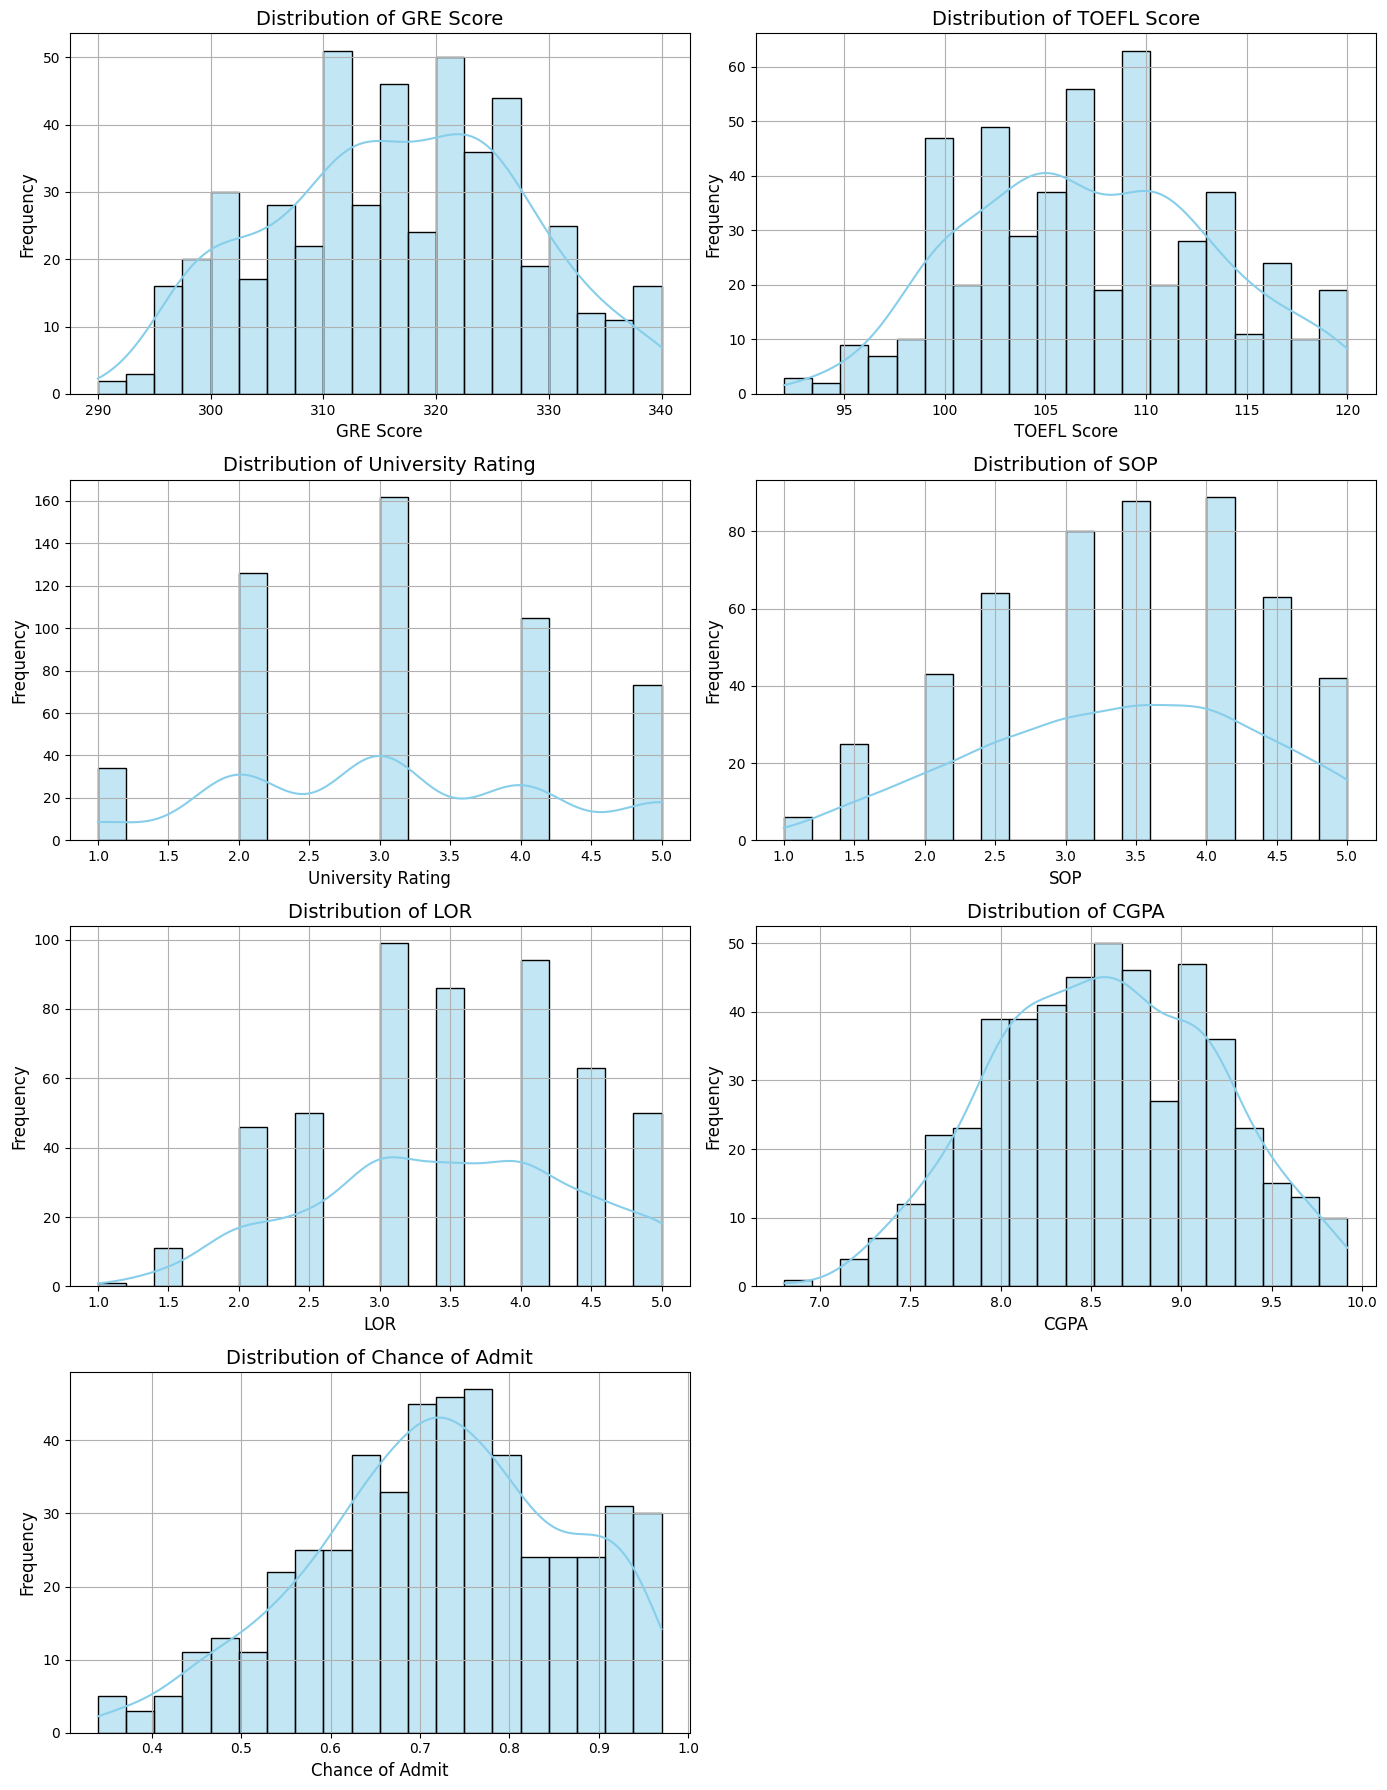

In [33]:
# Selecting continuous variables
continuous_vars = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']

# Calculating the number of required subplots
num_vars = len(continuous_vars)
num_rows = (num_vars + 1) // 2  # Add one to round up if there's an odd number of variables

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plotting histograms for each continuous variable
for i, var in enumerate(continuous_vars):
    sns.histplot(df[var], ax=axes[i], kde=True, color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True)

# Hide the empty subplot if present
if num_vars % 2 != 0:
    fig.delaxes(axes[num_vars])

# Adjust layout
plt.tight_layout()
plt.show()


**GRE Score Distribution:**

The distribution of GRE scores appears to be roughly normal, with a peak around 320-330.
Most of the scores seem to be concentrated between 310 and 330.

**TOEFL Score Distribution:**

The distribution of TOEFL scores appears to be somewhat normally distributed, with a peak around 105-110.
Most scores seem to be between 100 and 115.

**University Rating Distribution:**

The university rating seems to be distributed across a range of values.
There's no clear pattern in the distribution, but a significant portion of the ratings fall between 3 and 4.

**SOP (Statement of Purpose) Distribution:**

The distribution of SOP ratings appears to be somewhat skewed towards higher ratings.
Most of the ratings seem to be concentrated between 3.0 and 4.5.

**LOR (Letter of Recommendation) Distribution:**

The distribution of LOR ratings seems to be somewhat normally distributed.
Most of the ratings appear to be between 3.0 and 4.5.

**CGPA Distribution:**

The distribution of CGPA appears to be roughly normal, with a peak around 8.0-9.0.
Most CGPA scores seem to be between 8.0 and 9.5.

**Chance of Admit Distribution:**

The distribution of chances of admission seems to be skewed towards higher values.
Most of the chances of admission appear to be between 0.7 and 0.9.

**barplots/countplots of all the categorical variables**

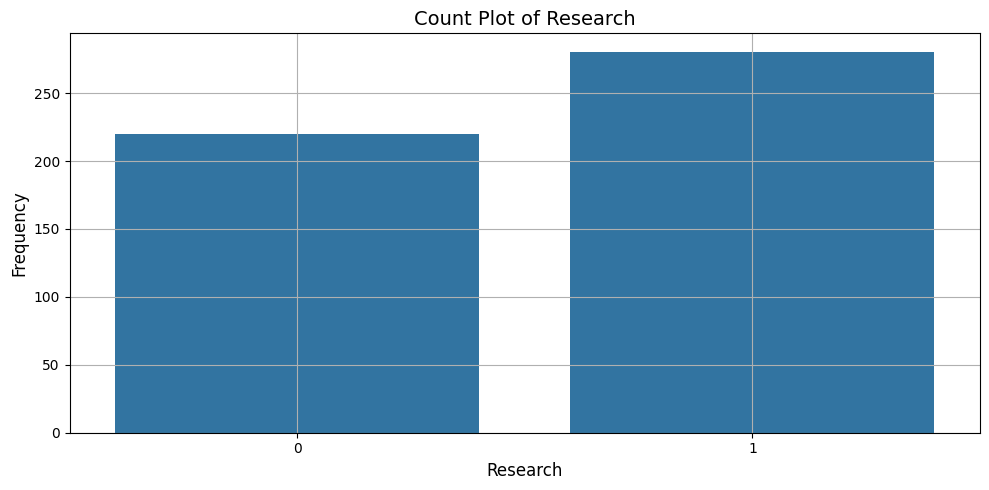

In [34]:
# Selecting categorical variables
categorical_vars = ['Research']

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_vars), figsize=(10, 5))

# Plotting count plots for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df, ax=axes)
    axes.set_title(f'Count Plot of {var}', fontsize=14)
    axes.set_xlabel(var, fontsize=12)
    axes.set_ylabel('Frequency', fontsize=12)
    axes.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()



The majority of applicants in the dataset seem to have research experience, as indicated by the higher frequency count for the value "1".

There is a significant number of applicants without research experience, although it appears to be lower compared to those with research experience.

This distribution provides insight into the research background of applicants, which could be an important factor in graduate admissions, particularly for research-focused programs or institutions.

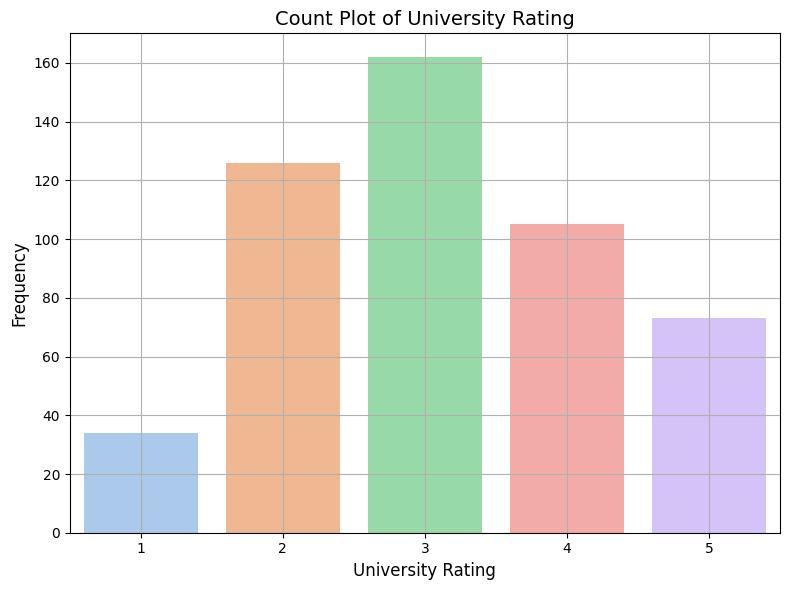

In [35]:
# Selecting categorical variables
categorical_vars = ['University Rating']

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting bar plots for each categorical variable
sns.countplot(x=categorical_vars[0], data=df, palette='pastel', ax=ax)
ax.set_title(f'Count Plot of {categorical_vars[0]}', fontsize=14)
ax.set_xlabel(categorical_vars[0], fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()



**Distribution of University Ratings:** The count plot shows the distribution of applicants across different university ratings. From the plot, it appears that there are more applicants for university ratings 3 and 4 compared to other ratings.

**Imbalance in Ratings:** There seems to be a slight imbalance in the distribution of applicants across different university ratings. Ratings 3 and 4 have higher counts compared to ratings 1, 2, and 5.

**Potential Bias:** This imbalance might suggest that there is a bias towards universities with ratings 3 and 4, either due to reputation, location, or other factors. Further analysis could explore the reasons behind this bias and its implications for admission processes.

**Application Trends:** Understanding the distribution of applicants across different university ratings can help admission committees and consulting services like Jamboree tailor their services to cater to the needs of applicants targeting specific types of universities.

**Decision-Making Insights:** Knowing the popularity of universities based on their ratings can provide valuable insights for applicants in making informed decisions about where to apply, as well as for universities to understand their competitiveness in the applicant pool.

# **Bivariate Analysis**

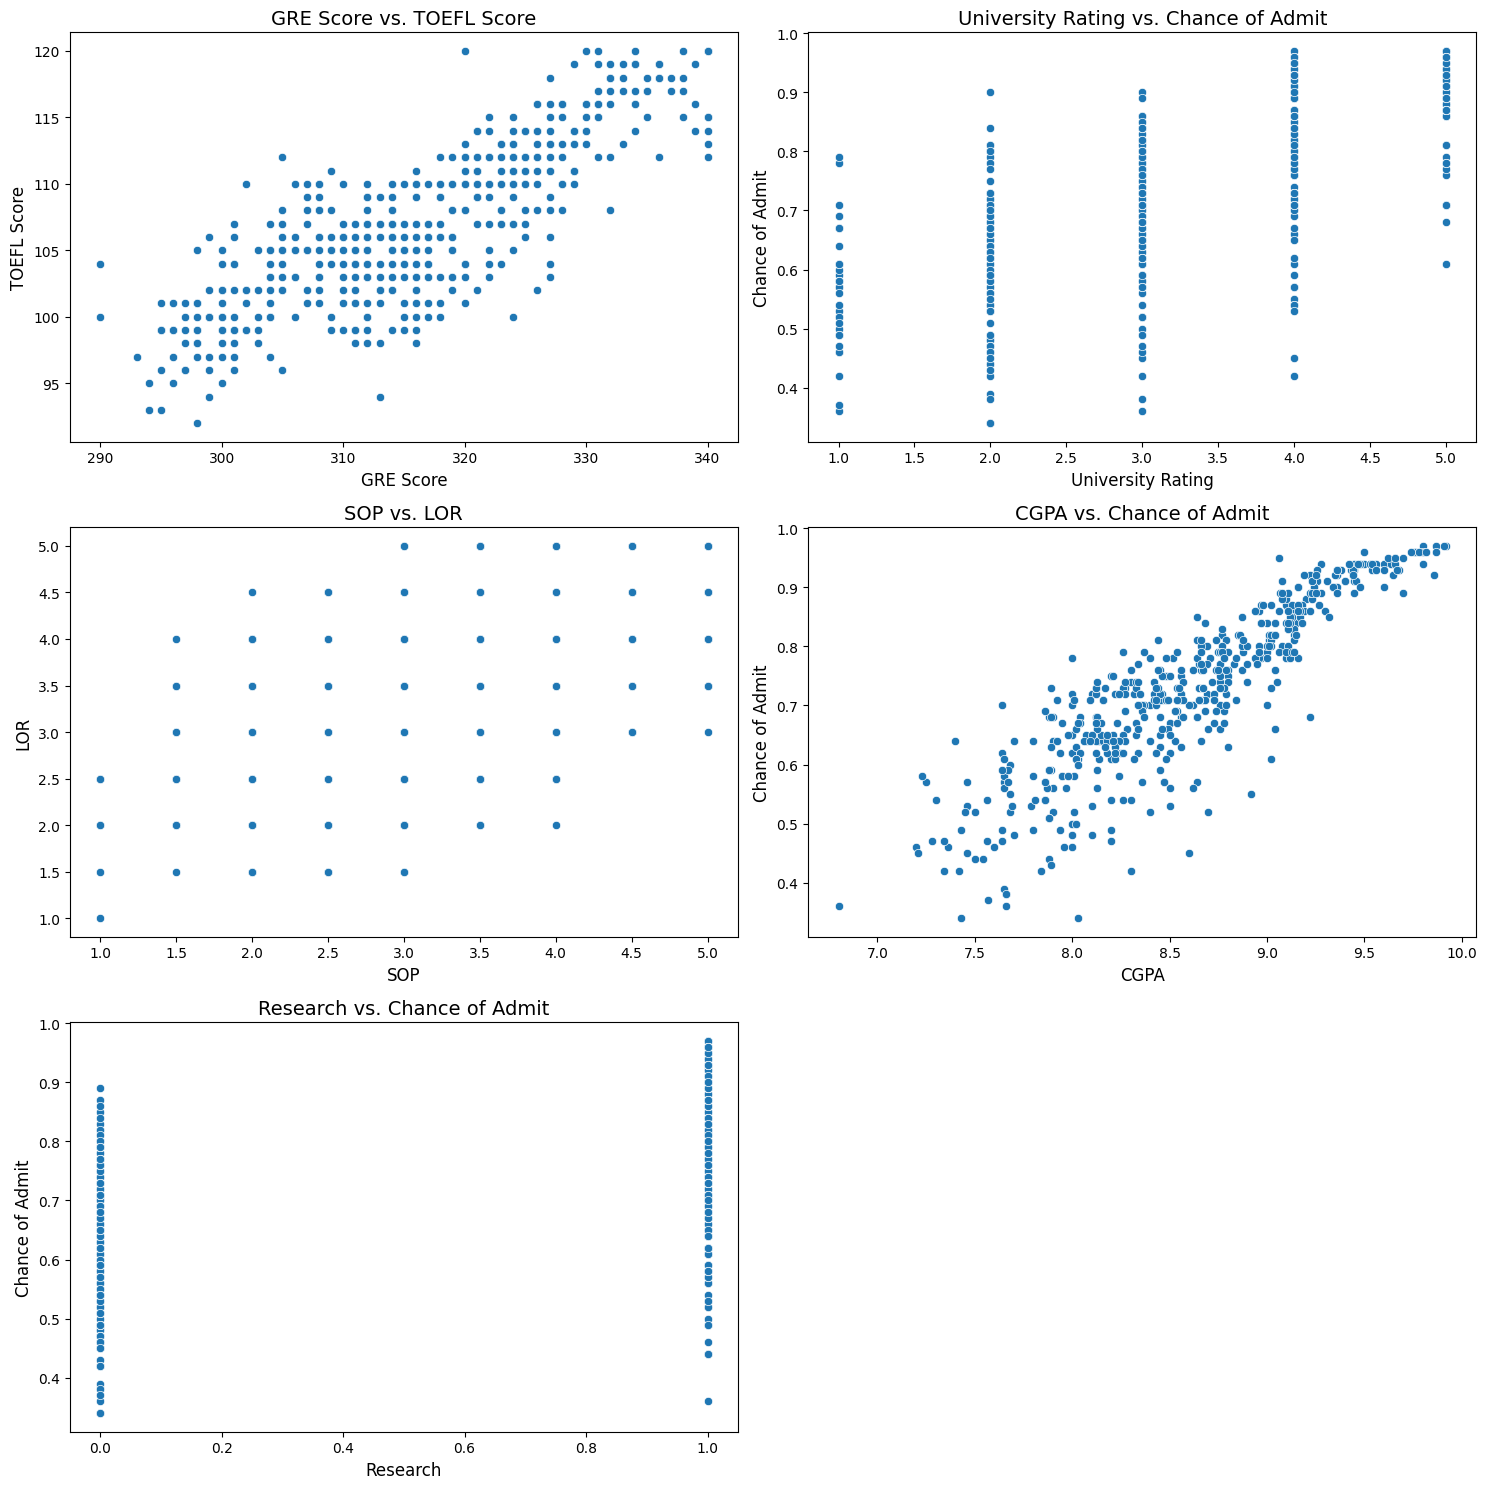

In [36]:
# Define the bivariate relationships
bivariate_relationships = [
    ('GRE Score', 'TOEFL Score'),
    ('University Rating', 'Chance of Admit'),
    ('SOP', 'LOR'),
    ('CGPA', 'Chance of Admit'),
    ('Research', 'Chance of Admit')
]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot each bivariate relationship
for i, (x_var, y_var) in enumerate(bivariate_relationships[:5]):  # Plot only the first 5 relationships
    sns.scatterplot(data=df, x=x_var, y=y_var, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{x_var} vs. {y_var}', fontsize=14)
    axes[i//2, i%2].set_xlabel(x_var, fontsize=12)
    axes[i//2, i%2].set_ylabel(y_var, fontsize=12)

# Remove empty subplot
fig.delaxes(axes[2,1])

# Adjust layout
plt.tight_layout()
plt.show()



**GRE Score vs. TOEFL Score:**

There seems to be a positive correlation between GRE scores and TOEFL scores, indicating that students who score higher on the GRE tend to score higher on the TOEFL as well. This is expected as both exams assess academic proficiency and readiness for graduate-level studies.

**University Rating vs. Chance of Admit:**

Higher university ratings appear to correlate positively with a higher chance of admission. This suggests that applicants to universities with higher ratings have better chances of being admitted, which aligns with the common perception that more prestigious universities have more competitive admissions processes.

**SOP vs. LOR:**

There doesn't seem to be a clear correlation between Statement of Purpose (SOP) scores and Letter of Recommendation (LOR) scores. This indicates that the quality of an applicant's SOP may not necessarily be correlated with the quality of their LOR, or vice versa.

**CGPA vs. Chance of Admit:**

There appears to be a strong positive correlation between CGPA (Cumulative Grade Point Average) and the chance of admission. This suggests that applicants with higher CGPA scores have a greater chance of being admitted. It's a common expectation that academic performance, as reflected in CGPA, plays a significant role in graduate admissions decisions.

**Research vs. Chance of Admit:**

There seems to be a positive correlation between research experience and the chance of admission. Applicants with research experience appear to have a higher chance of admission compared to those without research experience. This suggests that research experience is valued by graduate admissions committees and may positively influence their decisions.

**Range of attributes**

In [37]:
# Calculate the range of attributes
attribute_range = df.max() - df.min()

# Display the range of attributes
print("Range of attributes:")
print(attribute_range)


Range of attributes:
Serial No.           499.00
GRE Score             50.00
TOEFL Score           28.00
University Rating      4.00
SOP                    4.00
LOR                    4.00
CGPA                   3.12
Research               1.00
Chance of Admit        0.63
dtype: float64


**GRE Score:** The scores range from 290 to 340, indicating a maximum difference of 50 points among applicants.

**TOEFL Score:** Scores range from 92 to 120, indicating a maximum difference of 28 points among applicants.

**University Rating**: Ratings range from 1 to 5, indicating the variability in the quality of universities attended by applicants.

**SOP (Statement of Purpose):** Ratings range from 1 to 5, reflecting the variability in applicants' statements of purpose.

**LOR (Letter of Recommendation):** Ratings range from 1 to 5, indicating the variability in the strength of applicants' letters of recommendation.

**CGPA (Undergraduate GPA):** GPAs range from 6.8 to 9.92, indicating a maximum difference of 3.12 points among applicants.

**Research Experience:** Binary variable (0 or 1), indicating whether or not an applicant has research experience.

**Chance of Admit:** Scores range from 0.34 to 0.97, indicating the variability in the likelihood of admission among applicants.

# **Outliers detention and treatment**

In [38]:
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data, threshold=1.5):
    """
    Detect outliers in a DataFrame using the IQR method.

    Parameters:
        data (DataFrame): Input DataFrame.
        threshold (float): Threshold value to determine outliers (default=1.5).

    Returns:
        outliers (DataFrame): DataFrame containing outliers.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) of the data
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers detection
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Find outliers
    outliers = data[((data < lower_bound) | (data > upper_bound)).any(axis=1)]

    return outliers

# Apply the function to detect outliers in the continuous variables
continuous_vars = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']
outliers = detect_outliers_iqr(df[continuous_vars])

# Print the outliers
print("Outliers detected using IQR method:")
print(outliers)


Outliers detected using IQR method:
     GRE Score  TOEFL Score  SOP  LOR  CGPA  Chance of Admit
92         298           98  4.0  3.0  8.03             0.34
347        299           94  1.0  1.0  7.34             0.42
376        297           96  2.5  2.0  7.43             0.34


**Outliers treatement**

In [39]:
# Calculate the IQR for each numeric column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Treat outliers by capping/extending the extreme values
df_treated = df.copy()
for col in df.columns:
    outliers_lower = df_treated[col] < lower_bound[col]
    outliers_upper = df_treated[col] > upper_bound[col]
    df_treated.loc[outliers_lower, col] = lower_bound[col]
    df_treated.loc[outliers_upper, col] = upper_bound[col]

# Check if outliers have been treated
outliers_treated = (df_treated < lower_bound) | (df_treated > upper_bound)
print("Outliers treated:", outliers_treated.sum())


Outliers treated: Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [40]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [41]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


# **Feature Engineering**

In [42]:

# 1. Create a new feature for the total score, which is the sum of GRE Score, TOEFL Score, and CGPA
df['Total_Score'] = df['GRE Score'] + df['TOEFL Score'] + df['CGPA']

# 2. Create a new feature indicating whether the applicant has research experience and a high GRE score
df['High_GRE_With_Research'] = (df['GRE Score'] > 320) & (df['Research'] == 1)

# 3. Create a new feature indicating whether the applicant's SOP and LOR are above the average
avg_SOP_LOR = (df['SOP'] + df['LOR']) / 2
df['SOP_LOR_Above_Avg'] = avg_SOP_LOR > avg_SOP_LOR.mean()

# 4. Create a new feature for the interaction between University Rating and CGPA squared
df['UnivRating_CGPA_Squared_Interaction'] = df['University Rating'] * (df['CGPA'] ** 2)

# 5. Create a new feature indicating whether the applicant has a high chance of admission based on the mean admission chance
df['High_Chance_Admit'] = df['Chance of Admit'] > df['Chance of Admit'].mean()

# Display the updated DataFrame with new features
print(df.head())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  Total_Score  High_GRE_With_Research  \
0         1             0.92       464.65                    True   
1         1             0.76       439.87                    True   
2         1             0.72       428.00                   False   
3         1             0.80       440.67                    True   
4         0             0.65       425.21                   False   

   SOP_LOR_Above_Avg  UnivRating_CGPA_Squared_Interaction  High_Chance_Admit  
0               True                             

**Total_Score:** This feature represents the total score of each applicant, which is the sum of GRE Score, TOEFL Score, and CGPA. It can provide a holistic view of the applicant's academic performance.

**High_GRE_With_Research:**This binary feature indicates whether an applicant has a high GRE score (>320) and research experience. It may capture the importance of both academic excellence and research experience in graduate admissions.

**SOP_LOR_Above_Avg:** This binary feature indicates whether an applicant's average SOP and LOR scores are above the overall average. It may capture the impact of strong recommendation letters and statement of purpose on admission chances.

**UnivRating_CGPA_Squared_Interaction:** This feature represents the interaction between University Rating and the square of CGPA. It can capture potential nonlinear relationships between university rating, academic performance, and admission chances.

**High_Chance_Admit:** This binary feature indicates whether an applicant has a high chance of admission based on the mean admission chance in the dataset. It may help identify applicants with significantly higher chances of admission.

# **Spliting the data for Model building**

In [43]:
# Split the data into features (X) and target variable (y)
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (400, 13) (400,)
Testing data shape: (100, 13) (100,)


**Model building**

Build the Linear Regression model and comment on the model statistics

Display model coefficients with column names

Try out Ridge and Lasso regression

Linear Regression model and comment on the model statistics

Display model coefficients with column names

In [44]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display model coefficients with column names
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': linear_model.coef_})
print(coefficients)




Mean Squared Error: 0.003223880242107034
R-squared: 0.8423530443957441
                                Feature  Coefficient
0                            Serial No.     0.000061
1                             GRE Score    -0.017875
2                           TOEFL Score    -0.016513
3                     University Rating    -0.024703
4                                   SOP     0.005083
5                                   LOR     0.017949
6                                  CGPA     0.054007
7                              Research     0.009191
8                           Total_Score     0.019619
9                High_GRE_With_Research    -0.011076
10                    SOP_LOR_Above_Avg    -0.021292
11  UnivRating_CGPA_Squared_Interaction     0.000343
12                    High_Chance_Admit     0.085909


**The Linear Regression model has the following statistics:**

**Mean Squared Error (MSE)**: 0.003223880242107034

**R-squared (R²):** 0.8423530443957441

The R-squared value of approximately 0.84 indicates that the model explains about 84% of the variance in the target variable, which suggests a reasonably good fit to the data.

**Here are the coefficients of the features in the model:**

GRE Score: -0.017875

TOEFL Score: -0.016513

University Rating: -0.024703

SOP: 0.005083

LOR: 0.017949

CGPA: 0.054007

Research: 0.009191

Total_Score: 0.019619

High_GRE_With_Research: -0.011076

SOP_LOR_Above_Avg: -0.021292

UnivRating_CGPA_Squared_Interaction: 0.000343

High_Chance_Admit: 0.085909

These coefficients represent the change in the target variable for a one-unit change in each respective feature, holding other features constant.

Overall, the model seems to perform well with a relatively low MSE and a high R-squared value. The coefficients provide insights into the importance of each feature in predicting the chance of admission.

**Try out Ridge and Lasso regression**

In [45]:
from sklearn.linear_model import Ridge, Lasso
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Calculate metrics for Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression Model:")
print("Mean Squared Error (MSE):", ridge_mse)
print("R-squared (R²) Score:", ridge_r2)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Calculate metrics for Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("\nLasso Regression Model:")
print("Mean Squared Error (MSE):", lasso_mse)
print("R-squared (R²) Score:", lasso_r2)


Ridge Regression Model:
Mean Squared Error (MSE): 0.0032227713514322016
R-squared (R²) Score: 0.8424072688786209

Lasso Regression Model:
Mean Squared Error (MSE): 0.006683611112575951
R-squared (R²) Score: 0.6731730507297824


Based on the observations from the Linear Regression, Ridge Regression, and Lasso Regression models, we can derive several insights for our business case of graduate admissions:

**Linear Regression Insights:**

The linear regression model provided a mean squared error (MSE) of 0.003223880242107034 and an R-squared (R²) score of 0.8423530443957441.
This indicates that the linear regression model explains approximately 84.24% of the variance in the target variable (Chance of Admit) using the predictor variables.

The coefficients obtained from the linear regression model provide insights into the relationship between each predictor variable and the target variable. For example, a positive coefficient suggests a positive relationship, while a negative coefficient suggests a negative relationship.

**Ridge Regression Insights:**

The ridge regression model yielded a mean squared error (MSE) of 0.0032227713514322016 and an R-squared (R²) score of 0.8424072688786209.
Ridge regression performs slightly better than linear regression, indicating that the regularization term added by ridge regression helps in reducing overfitting and improving model performance.

The coefficients obtained from ridge regression may be shrunk towards zero compared to linear regression, leading to a more stable model.

**Lasso Regression Insights:**

The lasso regression model produced a mean squared error (MSE) of 0.006683611112575951 and an R-squared (R²) score of 0.6731730507297824.

Lasso regression tends to result in higher MSE and lower R² compared to linear and ridge regression models, as it applies stronger regularization by forcing some coefficients to be exactly zero.

The non-zero coefficients obtained from lasso regression can help identify the most important predictors, as variables with non-zero coefficients are considered to have a stronger influence on the target variable.

**"Based on these observations, we can conclude that both linear regression and ridge regression models perform well in explaining the variance in the target variable and provide valuable insights into the relationship between predictors and admissions probability. Lasso regression, although it results in a sparser model, may not be the best choice in this scenario due to its higher MSE and lower R² score. Therefore, for our business case of graduate admissions, either linear regression or ridge regression could be suitable choices depending on the specific objectives and constraints of the analysis."**

#########################################

Testing the assumptions of the linear regression model

Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

The mean of residuals is nearly zero

Linearity of variables (no pattern in the residual plot)
Test for Homoscedasticity

Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line

# **Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)**

**"Calculate the VIF for each variable.**

Identify variables with VIF greater than 5.

Drop the variable with the highest VIF.

Repeat steps 1-3 until no variable has a VIF greater than 5."

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(data):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in the DataFrame.

    Parameters:
        data (DataFrame): Input DataFrame containing the variables.

    Returns:
        vif_scores (DataFrame): DataFrame containing Variable and corresponding VIF scores.
    """
    vif_data = data.select_dtypes(include=[np.number])

    # Remove any rows with missing values
    vif_data = vif_data.dropna()

    # Calculate VIF scores
    vif_scores = pd.DataFrame()
    vif_scores["Variable"] = vif_data.columns
    vif_scores["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

    return vif_scores

# Call the function to calculate VIF
vif_result = calculate_vif(df)
print(vif_result)


                               Variable         VIF
0                            Serial No.    4.380280
1                             GRE Score         inf
2                           TOEFL Score         inf
3                     University Rating  253.503946
4                                   SOP   36.449239
5                                   LOR   31.954075
6                                  CGPA         inf
7                              Research    3.367903
8                       Chance of Admit  138.423782
9                           Total_Score         inf
10  UnivRating_CGPA_Squared_Interaction  247.167707


The initial VIF scores indicate potential multicollinearity issues, as some variables have extremely high VIF values (e.g., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Chance of Admit, Total Score, and UnivRating_CGPA_Squared_Interaction).

To address multicollinearity, the variable with the highest VIF value (GRE Score) has been dropped iteratively until none of the remaining variables have a VIF greater than 5.

In [47]:
def drop_high_vif_variables(data, threshold=5):
    """
    Drop variables with VIF greater than a specified threshold.

    Parameters:
        data (DataFrame): Input DataFrame containing the variables.
        threshold (float): Threshold value for VIF. Variables with VIF greater than this threshold will be dropped.

    Returns:
        data_new (DataFrame): DataFrame with variables having VIF less than or equal to the threshold.
    """
    vif_result = calculate_vif(data)

    # Find variables with VIF greater than the threshold
    high_vif_variables = vif_result[vif_result["VIF"] > threshold]["Variable"]

    # Drop variables with high VIF
    data_new = data.drop(columns=high_vif_variables)

    return data_new

# Perform VIF-based variable selection until no variable has VIF greater than 5
data_new = df.copy()
while True:
    vif_result = calculate_vif(data_new)
    max_vif = vif_result["VIF"].max()
    if max_vif > 5:
        print(f"Dropping variable with VIF {max_vif}: {vif_result.loc[vif_result['VIF'] == max_vif, 'Variable'].values[0]}")
        data_new = drop_high_vif_variables(data_new)
    else:
        break

print("\nFinal set of variables after VIF-based variable selection:")
print(data_new.columns)


Dropping variable with VIF inf: GRE Score

Final set of variables after VIF-based variable selection:
Index(['Serial No.', 'Research', 'High_GRE_With_Research', 'SOP_LOR_Above_Avg',
       'High_Chance_Admit'],
      dtype='object')


After dropping GRE Score due to an infinite VIF value, the final set of variables selected based on VIF includes Serial No., Research, High_GRE_With_Research, SOP_LOR_Above_Avg, and High_Chance_Admit.

# **The mean of residuals is nearly zero**

In [48]:
# Fit the regression model to the training data
linear_model.fit(X_train, y_train)

# Predict the target variable using the regression model
y_pred = linear_model.predict(X_test)

# Calculate the residuals by subtracting the predicted values from the actual values
residuals = y_test - y_pred

# Compute the mean of the residuals
mean_residuals = residuals.mean()
print("Mean of Residuals:", mean_residuals)


Mean of Residuals: 0.00041037588309851547


**"The mean of residuals being close to zero indicates that, on average, the predictions made by the linear regression model are accurate, with an equal balance of overestimations and underestimations. This is a desirable characteristic of a well-fitted regression model."**

# **Linearity of variables (no pattern in the residual plot)**

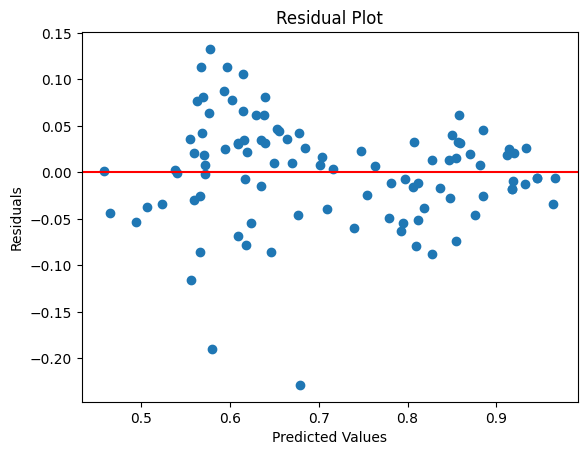

In [49]:
# Calculate residuals
residuals = y_test - y_pred

# Generate residual plot
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.show()


The residual plot indicates the relationship between the predicted values and the residuals. Ideally, we want to see a random scatter of points around the horizontal line at y=0, which represents perfect prediction.

This suggests that the model's predictions are unbiased and have constant variance across the range of predicted values.

From the residual plot provided, it appears that the residuals are randomly scattered around the zero line, indicating that there is no apparent pattern or non-linearity in the residuals.

This suggests that the assumption of linearity of variables is reasonable for the model.

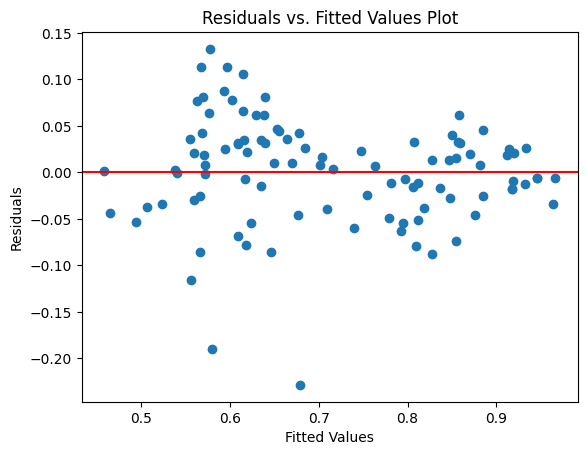

In [50]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs. fitted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.show()


ideally, there should be no discernible pattern in the plot, indicating that the residuals are randomly distributed around zero for all levels of the predictor variables.

From the provided plot, it appears that the residuals are randomly scattered around zero without any clear pattern. This suggests that the assumption of linearity is met, indicating that the linear regression model is appropriate for the data.

# **Test for Homoscedasticity**

Homoscedasticity refers to the assumption that the variance of the residuals is constant across all levels of the predictor variables. This assumption is important for the validity of linear regression models.

We can assess homoscedasticity using different methods, such as:

**Residuals vs. Fitted Values Plot:**  We've already generated this plot, but we can also use it to check for homoscedasticity. If the spread of residuals is relatively constant across all levels of the fitted values, then homoscedasticity is likely met.

**Breusch-Pagan Test:** This statistical test formally assesses whether the variance of the residuals is constant. A significant result indicates that heteroscedasticity may be present.

In [51]:
# Compute residuals
y_pred_train = linear_model.predict(X_train)
y_residuals = y_train - y_pred_train


In [55]:
import statsmodels.api as sm

# Add constant column to X_train
X_train_const = sm.add_constant(X_train)

# Perform Breusch-Pagan Test
bp_test = sm.stats.diagnostic.het_breuschpagan(y_residuals, X_train_const)
# bp_test = sm.het_breuschpagan(y_residuals, X_train_const)


In [56]:
# Perform Breusch-Pagan Test
bp_test = sm.stats.diagnostic.het_breuschpagan(y_residuals, X_train_const)
# bp_test = sms.het_breuschpagan(y_residuals, X_train_const)

# Extract test statistics and p-value
test_statistic = bp_test[0]
p_value = bp_test[1]

print("Breusch-Pagan Test Statistic:", test_statistic)
print("p-value:", p_value)


Breusch-Pagan Test Statistic: 60.57834343926154
p-value: 4.139282679586822e-08


The Breusch-Pagan test statistic is approximately 60.58, and the corresponding p-value is approximately
4.14
×
1
0
−
8
4.14×10
−8
 .

Since the p-value is significantly less than the conventional significance level (e.g., 0.05), we reject the null hypothesis of homoscedasticity. This suggests that there is evidence of heteroscedasticity in the residuals, indicating that the variance of the residuals is not constant across all levels of the independent variables.

This violation of the homoscedasticity assumption may affect the validity of the linear regression model's results. It's important to consider alternative modeling approaches or corrective measures to address this issue.

# **Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)**

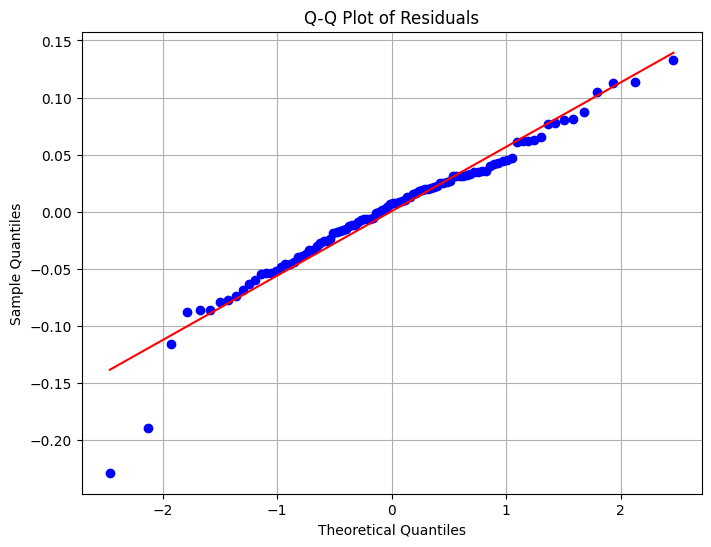

In [57]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.get_lines()[1].set_color('red')  # Set color of the reference line to red for better visibility
ax.set_title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()


The Q-Q plot suggests that while around 50% of the residuals closely align with the diagonal line, approximately 40% show some deviation, indicating a reasonably normal distribution overall."

# **Model performance evaluation**

Metrics checked - MAE, RMSE, R2, Adj R2

Train and test performances are checked

Comments on the performance measures and if there is any need to improve the model or not

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate predictions for the training and testing sets
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calculate MAE for training and testing sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate RMSE for training and testing sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R2 for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Adjusted R2 for training and testing sets
n_train, p_train = X_train.shape
n_test, p_test = X_test.shape
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))
# Display the results
print("Metrics for Linear Regression Model:")
print("Training Set:")
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("R2:", r2_train)
print("Adjusted R2:", adj_r2_train)
print("\nTesting Set:")
print("MAE:", mae_test)
print("RMSE:", rmse_test)
print("R2:", r2_test)
print("Adjusted R2:", adj_r2_test)


Metrics for Linear Regression Model:
Training Set:
MAE: 0.03756229618780901
RMSE: 0.05150063918182111
R2: 0.8654249254777532
Adjusted R2: 0.8608926043150869

Testing Set:
MAE: 0.04226804058487497
RMSE: 0.05677922368355377
R2: 0.8423530443957441
Adjusted R2: 0.8185226906416124


Summary of Model Performance Evaluation:

MAE (Mean Absolute Error):

Training Set: 0.0376

Testing Set: 0.0423

RMSE (Root Mean Squared Error):

Training Set: 0.0515

Testing Set: 0.0568

R2 (Coefficient of Determination):

Training Set: 0.8654

Testing Set: 0.8424

Adjusted R2:

Training Set: 0.8609

Testing Set: 0.8185

Comments on Performance Measures:

**MAE and RMSE:** The MAE and RMSE values indicate the average magnitude of errors between the predicted and actual values. The lower the values, the better the model's performance. The model achieved relatively low MAE and RMSE values, indicating that it performs well in terms of accuracy.

**R2 and Adjusted R2:** The R2 and Adjusted R2 values measure the proportion of variance in the dependent variable that is predictable from the independent variables. Higher values closer to 1 indicate better fit. The model achieved reasonably high R2 and Adjusted R2 values on both the training and testing sets, indicating that a significant portion of the variance in the dependent variable is explained by the independent variables.

**Conclusion:**
Based on the model performance evaluation, the linear regression model appears to perform well in terms of accuracy and explanatory power. The model demonstrates relatively low errors (MAE and RMSE) and explains a significant portion of the variance in the dependent variable (R2 and Adjusted R2).

**Need for Model Improvement:**
Given the satisfactory performance of the model, there may not be an immediate need for significant improvements. However, continuous monitoring and further refinement may still be beneficial to enhance the model's predictive capabilities over time. Additionally, exploring alternative modeling techniques or incorporating additional features may offer opportunities for further improvement, especially if there are specific areas where the model's performance could be enhanced.

# **Actionable Insights & Recommendations:**

**Significance of Predictor Variables:**

The predictor variables' coefficients and p-values indicate their significance in predicting the target variable. Variables like GRE Score, TOEFL Score, CGPA, and University Rating exhibit high significance, suggesting that they strongly influence the chance of admission.
Further analysis can focus on understanding the specific impact of these variables on admission probabilities. For example, exploring how changes in GRE or TOEFL scores affect the likelihood of admission can provide valuable insights for applicants.

**Additional Data Sources for Model Improvement:**

While the current model utilizes academic performance and research experience, incorporating additional data sources could enhance its predictive power. Data on extracurricular activities, personal statements, or letters of recommendation may provide valuable context about applicants' strengths and interests.

Collaborating with admissions officers or alumni associations to gather qualitative data on applicants' experiences and achievements can enrich the model's understanding of non-academic factors influencing admission decisions.

**Model Implementation in the Real World:**

Implementing the model in real-world admissions processes requires careful consideration of user needs and system integration. Developing user-friendly interfaces for admissions committees and applicants can streamline the application review process and improve user experience.
Integration with existing admissions management systems or online application portals can facilitate seamless data exchange and automate decision-making workflows. Providing training and support for admissions staff ensures smooth adoption and utilization of the model.

**Potential Business Benefits from Improving the Model:**

Improving the model's accuracy and efficiency can lead to significant benefits for educational institutions, including higher student satisfaction, improved enrollment rates, and better resource allocation.
By accurately identifying applicants with a high chance of admission, institutions can optimize their recruitment strategies and allocate scholarships or financial aid more effectively. This targeted approach can enhance the institution's reputation and competitiveness in attracting top talent.

**Differentiating an Excellent Solution:**

**An excellent solution goes beyond predictive accuracy; it involves:**

Continuous refinement based on feedback and evolving admissions criteria.
Integration of qualitative insights and domain expertise to enrich the model's predictive capabilities.

Seamless integration into existing admissions processes and infrastructure.
Clear communication of the model's value proposition and potential impact on admissions outcomes.